# Classification and Logistic Regression

Lets now talk about the classification problem. This is just like the regression problem, except that the vlaues y are now want to predict take on only a small number of discrete values. For now, we will focus on the **binary classification** problem in which y can take on two values, 0 and 1. (Most of what this notebook say here will also generalize to the multiple-class case). For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a piece of email, and $y$ may be 1 if it is a piece of spam mail, and 0 otherwise. 0 is called **negative class**, and 1 the **positive class**, they are sometimes also denoted by the symbols "$-$" and "$+$". Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the **label** for the training example.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/files

/content/drive/MyDrive/files


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [ ]:
df = pd.read_csv("iris.csv")
df = df.sample(frac=1).reset_index(drop=True)
df[:5]

,sepal_length,sepal_width,petal_length,petal_width,class
0,6.5,3.0,5.2,2.0,Iris-virginica
1,6.3,2.3,4.4,1.3,Iris-versicolor
2,5.0,2.3,3.3,1.0,Iris-versicolor
3,7.0,3.2,4.7,1.4,Iris-versicolor
4,5.5,2.4,3.8,1.1,Iris-versicolor


As we are working on the logistic regression and where the target variable $\in \{0, 1\}$, its better to convert the class variable to the

In [ ]:
df['class'].unique()
df['class'] = df['class'].apply(lambda x: 1 if x == 'Iris-virginica' else 0 )
sample = df[:5]
df = df[5:].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  145 non-null    float64
 1   sepal_width   145 non-null    float64
 2   petal_length  145 non-null    float64
 3   petal_width   145 non-null    float64
 4   class         145 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.8 KB


Here x's are four-dimensional vector in $\mathbb{R}^4$. For instance, $x_1^{(i)}$ is the `sepal_length`, $x_2^{(i)}$ is the `sepal_width`, $x_3^{(i)}$ is the `petal_length`, and $x_4^{(i)}$ is the `petal_width` of the i-th house in the training set.<br>
Hypothesis for the $X$ & $\theta$(parameters) can be written as

$$\begin{align*}
h_\theta(x) &= \theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_3 + \theta_4x_4 \\
&= \sum_{i=0}^{d}\theta_ix_i \text{ where $x_0$ is intercept term}\\
&= \theta^Tx
\end{align*}$$


In [ ]:
# to replicate the values across, lets set the random seed
np.random.seed(seed=123456)
X = df[['sepal_length','sepal_width', 'petal_length', 'petal_width']].to_numpy()
y = df[['class']].to_numpy()
#We then need to add a feature of “1” concatenating it with the dataset we already have and also add q to the vector m.
X = np.concatenate([np.ones((X.shape[0],1)), X], axis = 1)

In [ ]:
# contains the theta random theta values from θ1, θ2, θ3, θ4
θ_1_4 = np.random.rand(4,1)

# creating the θ0(theta zero or intecept)
θ0 = np.random.rand(1)

# complete hθ
hθ = np.concatenate([θ_1_4,θ0.reshape(1,-1)],axis = 0)
print(hθ.shape)
print(hθ)


(5, 1)
[[0.12696983]
 [0.96671784]
 [0.26047601]
 [0.89723652]
 [0.37674972]]


#2.1 Logistic regression

We could approach the classification problem ignoring the fact that $y$ is discrete-valued, and use old linear regression algorithm to try to predict $y$ given $x$. However, it is easy to construct examlpes where this method performs very poorly. Intuitively, it also deosn't make sense for $h_\theta(x)$ to take values larger than 1 or smaller than 0 when we know that $ y \in \{0, 1\}$.

To fix this, let's change the form for our hypothesis $h_\theta(x)$. We will choose
$$h_\theta(x) = g(\theta^Tx) = \frac{1}{1 + e^{-\theta^Tx}},$$
where
$$g(z) = \frac{1}{1+e^{-z}}$$
is called the **logistic function** or the **sigmoid function**. Here is a plot showing $g(z)$:
<figure>
  <img src="./TraditionalML/images/sigmoid_activation_function.png" width="40%"/>
  <figcaption>Ref: https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf</figcaption>
</figure>
 <br>

Notice that $g(z)$ tends towards 1 as $z \to \infty$, and $g(z)$ tends towards $0$ as $z \to -\infty$. Moreover, $g(z)$, and hence also $h(x)$, is always bounded between $0$ and $1$. As before, we are keeping the convention of letting $x_0 = 1$, so that $ \theta^Tx = \theta_0 + \sum_{j=1}^d\theta_jx_j$.<br>



In [ ]:
# lets define sigmoid function
def sigmoid(Z):
    return 1/(1 + np.exp(-Z))

For now, let's take the choice of $g$ as given. Other functions that smoothly increase from $0$ to $1$ can also be used, but for a couple of reasons that we'll see later( when we talk about GLMs, and when we talk about generative learning algorithms), the choice of the logistic function is a fairly natural one. Before moving on, here's a useful property of the derivative of the signmoid fucntion, which we write as $g'$:<br>

$$\begin{align*}g'(z) &= \frac{d}{dz}\frac{1}{1 + e^{-z}} \\
&= \frac{1}{(1 + e^{-z})^2}(e^{-z}) \\
&= \frac{1}{(1 + e^{-z})}.\left(1 - \frac{1}{(1 + e^{-z})}\right)\\
&=g(z)(1-g(z))
\end{align*}$$

 So, given the logistic regression model, how do we fit $\theta$ for it? Following how we saw least squares regression could be derived as the maximum like-lihood estimator under a set of assumptions, let's endow our classficitiona model with a set of probabilistc assumptions, lets endow our classifiction model with a set of probabilistic assumptions, and then fit the parameters via maximum likelihood. <br>

 Let us assume that
 $$\begin{align*}
 P(y = 1 | x; \theta) &= h_\theta(x) \\
 P(y = 0 | x; \theta) &= 1 - h_\theta(x)
 \end{align*}$$

 <br>Note that this can be written more compactly as<br>
 $$\begin{align*}
 p(y | x;\theta) = (h_\theta(x))^y (1 - h_\theta(x))^{1-y}
 \end{align*}$$
 <br>
 Assuming that the $n$ traininig examples were generated independently, we can then write down the likelihood of the parameters as
 $$\begin{align*}
 L(\theta) &= p(\vec{y}| X;\theta) \\
 &= \prod_{i=1}^np(y^{(i)} | x^{(i)}; \theta) \\
 &= \prod_{i=1}^np(h_\theta(x^{(i)}))^{y^{(i)}}(1 - h_\theta(x^{(i)}))^{1 - y^{(i)}}
\end{align*}$$

As before, it will be easier to maximize the log likelihood:
$$\begin{align*}
l(\theta) &= \text{log} L(\theta) \\
&= \sum_{i=n}^ny^{(i)}\text{log}h(x^{(i)}) + (1 - y^{(i)})\text{log}(1 - h(x^{(i)}))
\end{align*}$$



In [ ]:
a = np.array([[1.0, 2.0, 3.0], ])
b = np.array([[2.0], [2.0], [2.0]])
#print(f'{a*b}, {np.dot(a,b)}, {a.shape} {b.shape}')
# print(f' {np.dot(a,b)},  {a.shape} {b.shape}')
# print(f'{a.T*b}, , {a.T.shape} {b.shape}')

In [ ]:
# we have defined the cost fuction lθ, which is modelled after the mean square error
def max_log_likelihood(X, y, hθ):
    hx = np.dot(X,hθ)
    gx = sigmoid(hx)

    epsilon = 1e-5
    lθ = np.sum((y*np.log(gx + epsilon)) + (1-y)*np.log(1-gx + epsilon))
    #print(f'{lθ}, "max_log_likelihood"')
    return lθ

How do we maximize the likelihood? Similar to our derivation in the case of linear regression, we can use gradient ascent. Written in vectorial notation, our update will therefore be given by $ \theta := \theta + \alpha\Delta_\theta l(\theta)$. (Note the positive rather than negative sign in the update formula, since we'are maximizing, rather than minimizing, a function now.) Let's start by working with just one training examle $(x,y)$, and take derivatives to derive the stochastic gradient ascent rule:

$$
\begin{align*}
\frac{\partial}{\partial \theta_j} l(\theta) &= \left( y \frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)}  \right)\frac{\partial}{\theta_j}g(\theta^Tx)\\
&= \left( y \frac{1}{g(\theta^Tx)} - (1-y)\frac{1}{1-g(\theta^Tx)}  \right) g(\theta^Tx)(1 - g(\theta^Tx))\frac{\partial}{\partial \theta_j}\theta^Tx \\
&= (y(1 - g(\theta^Tx)) - (1-y)g(\theta^Tx))x_j \\
&=(y -h\theta(x))x_j
\end{align*}$$
<br>
Above, we used the fact that $g'(z) = g(z)(1-g(z))$. This therefore gives us the stochastic gradient ascent rule:
$$ \theta_j := \theta_j + \alpha(y^{(i)} - h_\theta(x^{(i)}))x_j^{(i)}$$
<br>
If we compare this to the LMS update rule, we that it looks identical; but this $\textit{not}$ the same algorithm, becuase $h_\theta(x^{(i)})$ is now defined as a non-linear function of $\theta^Tx^{(i)}$. Nonetheless, its a little suprising that we end up with the same update rule for a rather different algorithm and learning problem.

In [ ]:
def partial_derivative(X_batch, y_batch, hθ):
    y_pred = sigmoid(np.dot(X_batch,hθ))
    df_dhθ = np.dot(X_batch.T, (y_batch - y_pred))
    #df_dhθ = df_dhθ.reshape(len(df_dhθ), -1)

    return df_dhθ

In [ ]:
def training_batch(X, y, batch_size, lr, epochs, hθ):
    cost_lst = []
    for epoch in range(epochs):
        # shuffle X and y using same permutation
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)

        X = X[indices]
        y = y[indices]

        # store cumulative derivative
        cumulative_derivative = np.zeros((X.shape[1], 1))

        for batch in range(len(X)//batch_size):
            start = batch*batch_size
            stop = (batch*batch_size) + batch_size

            X_batch = X[start:stop]
            y_batch = y[start:stop]
            parti = partial_derivative(X_batch, y_batch, hθ)
            cumulative_derivative = cumulative_derivative + parti

            #updating rule
            hθ = hθ + (lr * cumulative_derivative)

        #print(f'X.shape, {X.shape}, y.shape, {y.shape}, {epoch}')
        print(f"epoch: {epoch} ----> MSE: {max_log_likelihood(X, y, hθ)}")
        cost_lst.append(max_log_likelihood(X, y, hθ))
    plt.plot(np.arange(1,epochs),cost_lst[1:], color = 'red')
    plt.title('Cost function Graph')
    plt.xlabel('Number of iterations')
    plt.ylabel('Cost')
    return hθ


epoch: 0 ----> MSE: -564.1323604125006
epoch: 1 ----> MSE: -127.8953156364198
epoch: 2 ----> MSE: -564.1050344638818
epoch: 3 ----> MSE: -308.19225533776216
epoch: 4 ----> MSE: -564.1321262747219
epoch: 5 ----> MSE: -76.63661721777015
epoch: 6 ----> MSE: -557.0954768771496
epoch: 7 ----> MSE: -673.2161832347331
epoch: 8 ----> MSE: -564.1242482632767
epoch: 9 ----> MSE: -126.77573410085918
epoch: 10 ----> MSE: -563.2555140027459
epoch: 11 ----> MSE: -477.1061755112104
epoch: 12 ----> MSE: -382.09494070809484
epoch: 13 ----> MSE: -603.57354728072
epoch: 14 ----> MSE: -544.5198350813179
epoch: 15 ----> MSE: -415.4197585283662
epoch: 16 ----> MSE: -374.45674614319535
epoch: 17 ----> MSE: -485.58938576456507
epoch: 18 ----> MSE: -272.7933714817902
epoch: 19 ----> MSE: -534.8642759721911
epoch: 20 ----> MSE: -241.1739233227729
epoch: 21 ----> MSE: -539.3417910694441
epoch: 22 ----> MSE: -46.293258300737804
epoch: 23 ----> MSE: -394.69530915136454
epoch: 24 ----> MSE: -389.66756116384
epoch: 

array([[-3.18812936],
       [-6.23222366],
       [-6.13693063],
       [ 9.38673008],
       [ 7.79198223]])

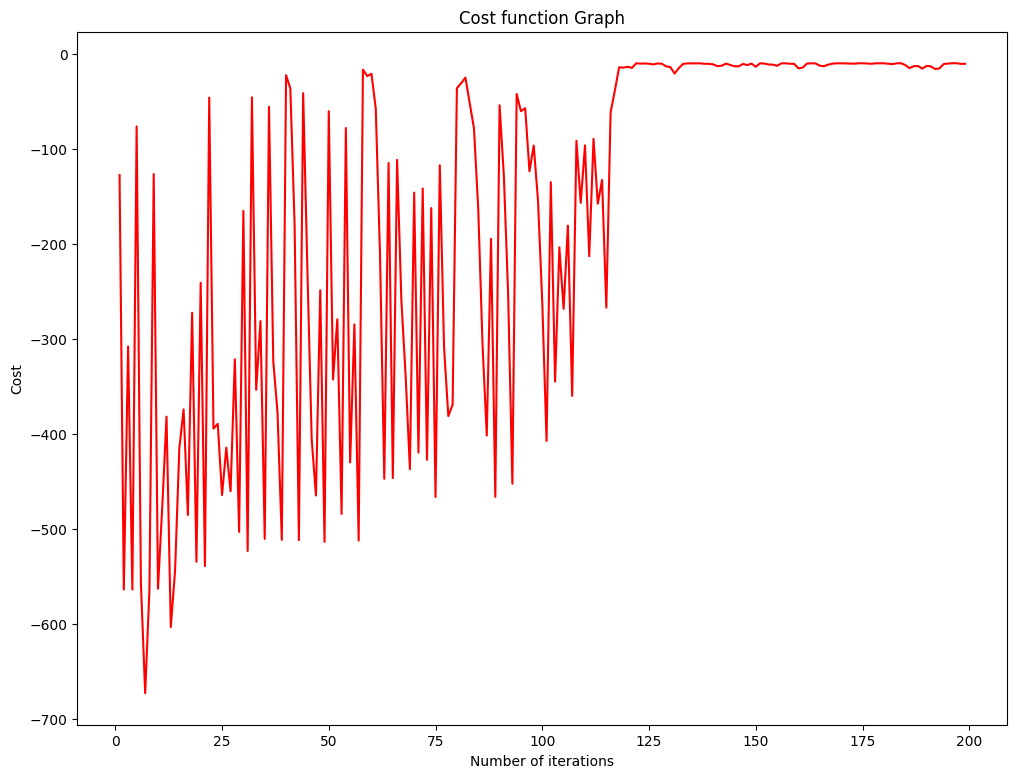

In [ ]:
batch_size = 100
lr = 0.01
epochs = 200

hθ = training_batch(X,y, batch_size,lr,epochs, hθ)
hθ

In [ ]:
# predict the sample dataframe using the parameters
# to replicate the values across, lets set the random seed
#np.random.seed(seed=123456)
X_test = sample[['sepal_length','sepal_width', 'petal_length', 'petal_width']].to_numpy()
y_test = sample[['class']].to_numpy()
#We then need to add a feature of “1” concatenating it with the dataset we already have and also add q to the vector m.
X_test = np.concatenate([np.ones((X_test.shape[0],1)), X_test], axis = 1)
# contains the theta random theta values from θ1, θ2, θ3, θ4
y_pred = sigmoid_function(np.dot(X_test, hθ))

In [ ]:
y_pred

array([[9.07759970e-01],
       [5.85323899e-03],
       [6.15255402e-05],
       [1.09138551e-05],
       [3.51398466e-04]])

In [ ]:
y_test

array([[1],
       [0],
       [0],
       [0],
       [0]])

Our Model was able to predict 4 out of 5 instances correctly. Now comes the evaluation metrics and tuning the parameters based on the metrics.

References:


1.   https://cs229.stanford.edu/notes2021fall/cs229-notes1.pdf
2.   https://medium.com/@IwriteDSblog/gradient-descent-for-logistics-regression-in-python-18e033775082

